## Rasterising and combining the coastal and glacial shapefiles

Aim is to rasterise the shapefiles into the same projection so that they can then be combined into a single file. It is assumed that there is habitat for the birds if there is land and no ice coverage.

In [1]:
import os
import numpy as np
from pycoalescence import Map
import matplotlib.pyplot as plt

In [2]:
# Define our input data
# Define the coastline raster dir - run rasterising_coastlines to create this
coastlines_raster_dir = os.path.join("data", "rasters", "historical_coastlines")
# Define the glacial raster dir - run rasterising_coastlines to create this
glacial_raster_dir = os.path.join("data", "rasters", "glacial")
# Define the output data
density_raster_dir = os.path.join("data", "density")
if not os.path.exists(density_raster_dir):
    os.makedirs(density_raster_dir)
# Set the resolution of your files
resolution = 0.1

In [4]:
# Assume that the rasterise_coastlines notebook has already been run
# Loop over the rasters and pick the correct raster for the m_glacial
for i in range(1, 61, 1):
    coastal_raster = os.path.join(coastlines_raster_dir, "{:.2f}mya.tif".format(i/100))
    density_raster = os.path.join(density_raster_dir, "{:.2f}mya_density.tif".format(i/100))
    if not os.path.exists(coastal_raster):
        print("Skipping {}... file does not exists.".format(coastal_raster))
        continue
    m_coastline = Map(coastal_raster)
    m_coastline.create_copy(dst_file=density_raster)
    m_density = Map(density_raster)
    m_density.open()
    m_glacial = Map(os.path.join(glacial_raster_dir, "{}.tif".format(i)))
    m_glacial.open()
    # Set any values in our density map to 0 where the glacial data is > 0
    m_density.data[np.ma.masked_where(m_glacial.data > 0, m_density.data).mask] = 0
    m_density.write()

Skipping data/rasters/historical_coastlines/0.19mya.tif... file does not exists.
Skipping data/rasters/historical_coastlines/0.53mya.tif... file does not exists.
Skipping data/rasters/historical_coastlines/0.58mya.tif... file does not exists.


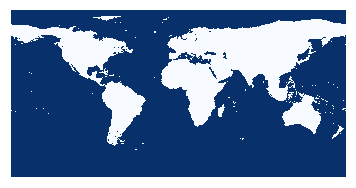

In [21]:
%matplotlib inline
import seaborn as sb
# Can easily plot any one we want
m_density = Map(os.path.join(density_raster_dir, "0.02mya_density.tif"))
m_density.open()
sb.heatmap(m_density.data, cmap="Blues_r", square=True, vmin=0, vmax=1,
           yticklabels=False, xticklabels=False, cbar=False)